## Importing neccessary modules

In [1]:
import time

start_time = time.time()

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as accs
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Loading data

In [3]:
estate=pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_9\DS2_C5_S7_AllRent_Data_Challenge.csv")
estate.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


### Data preprocessing and exploration

In [4]:
objects=estate.select_dtypes(include=["object"])
encoder=LabelEncoder()
for item in objects:
    if(item=="interest_level"):
        continue
    estate[item]=encoder.fit_transform(estate[item])

In [5]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   int32  
 4   created          9871 non-null   int32  
 5   description      9871 non-null   int32  
 6   display_address  9871 non-null   int32  
 7   features         9871 non-null   int32  
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   int32  
 12  photos           9871 non-null   int32  
 13  price            9871 non-null   int64  
 14  street_address   9871 non-null   int32  
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int32(8), int64(4), object(1)
memory usage: 9

In [6]:
estate.isna().sum()

Unnamed: 0         0
bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [7]:
estate.corr()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
Unnamed: 0,1.000000,-0.007826,-0.024353,-0.009217,0.024144,0.022754,0.022726,-0.006156,-0.008849,-0.855608,0.005866,-0.006210,-0.788773,-0.010804,-0.003738
bathrooms,-0.007826,1.000000,0.528971,0.025727,0.015342,0.005536,-0.002514,-0.023881,0.007422,0.000749,-0.000629,0.020020,-0.010918,0.617426,-0.023095
bedrooms,-0.024353,0.528971,1.000000,0.040990,0.015569,-0.023817,-0.038060,0.008743,0.015035,0.021417,-0.008100,0.003476,0.012428,0.431208,-0.003845
building_id,-0.009217,0.025727,0.040990,1.000000,-0.004659,-0.041430,-0.057732,-0.059029,-0.014378,0.005371,0.006890,0.005752,-0.028622,0.023205,0.006491
created,0.024144,0.015342,0.015569,-0.004659,1.000000,0.008942,0.016070,-0.003088,-0.002082,0.289499,0.006923,0.000276,0.275808,-0.006865,0.013276
description,0.022754,0.005536,-0.023817,-0.041430,0.008942,1.000000,0.047988,-0.032539,0.002551,-0.016524,-0.005197,-0.005151,0.006172,0.002709,-0.013908
display_address,0.022726,-0.002514,-0.038060,-0.057732,0.016070,0.047988,1.000000,0.054930,-0.002432,-0.013789,0.007182,-0.049549,0.011929,0.038527,0.058999
features,-0.006156,-0.023881,0.008743,-0.059029,-0.003088,-0.032539,0.054930,1.000000,-0.008677,0.001838,0.016854,-0.027272,0.011199,-0.042215,0.025027
latitude,-0.008849,0.007422,0.015035,-0.014378,-0.002082,0.002551,-0.002432,-0.008677,1.000000,0.012773,-0.967374,-0.010091,0.014216,0.005881,-0.000977
listing_id,-0.855608,0.000749,0.021417,0.005371,0.289499,-0.016524,-0.013789,0.001838,0.012773,1.000000,-0.008984,0.009005,0.851734,-0.000628,0.007232


In [8]:
estate_viz=estate.iloc[:,[1,2,13,15]]

## Visualization

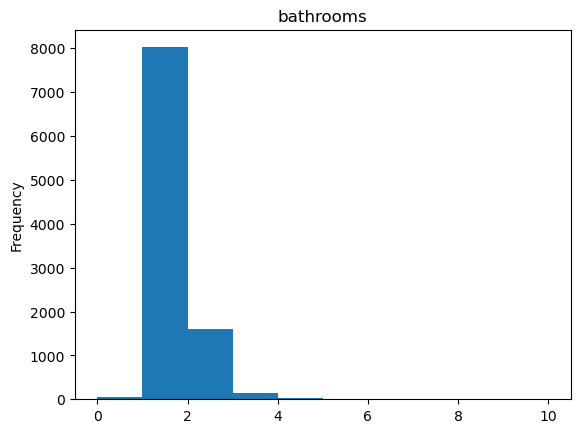

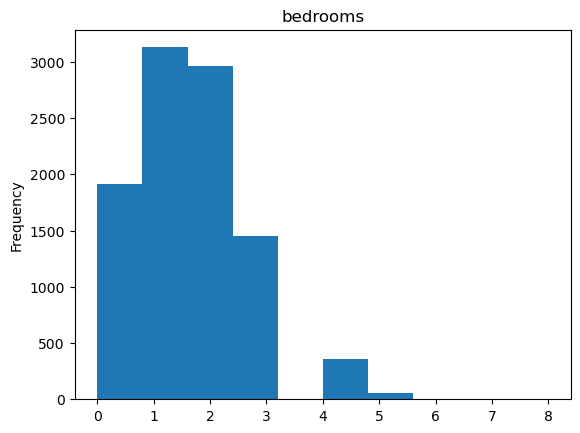

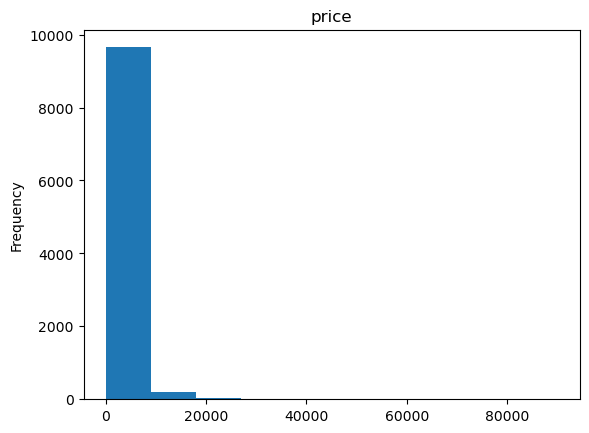

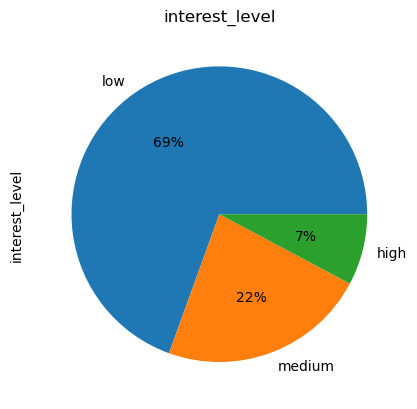

In [9]:
def plot_hist_pie(df):
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            df[col].plot.hist()
        elif df[col].dtype == 'object':
            df[col].value_counts().plot.pie(autopct="%d%%")
        plt.title(col)
        plt.show()
plot_hist_pie(estate_viz)

## Model building 

##### train and test split

In [10]:
x=estate.iloc[:,:15]
y=estate.interest_level

#### Scaling and Train_test_split

In [11]:
all_scores,names=[],[]
x=estate.drop("interest_level",axis=1)
y=estate.interest_level

In [12]:
scaler=MinMaxScaler()
scaled_x=pd.DataFrame(scaler.fit_transform(estate.drop("interest_level",axis=1)),columns=x.columns)
scaled_x

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,0.850088,0.1,0.000,0.059255,0.088582,0.429839,0.132075,0.047646,0.947312,0.016277,0.155606,0.586589,0.022863,0.030648,0.353240
1,0.888891,0.1,0.125,0.329261,0.702192,0.379839,0.448809,0.090217,0.946873,0.104223,0.155676,0.296671,0.242461,0.022866,0.391541
2,0.452503,0.1,0.125,0.407758,0.475098,0.820276,0.429013,0.450803,0.946678,0.216810,0.155595,0.480463,0.486554,0.032871,0.311490
3,0.304518,0.1,0.250,0.816432,0.151692,0.727419,0.948345,0.270369,0.946982,0.323989,0.155428,0.924747,0.714861,0.032871,0.626248
4,0.543513,0.1,0.250,0.638668,0.879863,0.626382,0.577173,0.184945,0.947366,0.279018,0.155833,0.038591,0.620468,0.036206,0.258305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,0.811237,0.1,0.000,0.806659,0.238373,0.150346,0.570368,0.654638,0.947122,0.035413,0.155813,0.986493,0.084921,0.021755,0.661282
9867,0.697175,0.1,0.250,0.153329,0.433532,0.270392,0.535725,0.102904,0.946185,0.061160,0.155473,0.254221,0.144584,0.039430,0.987838
9868,0.360742,0.1,0.125,0.851252,0.393866,0.437212,0.335292,0.451931,0.948079,0.204351,0.155773,0.305837,0.462167,0.032871,0.960610
9869,0.813777,0.1,0.000,0.710141,0.695603,0.772235,0.789978,0.476459,0.946641,0.101517,0.155373,0.278341,0.235275,0.027591,0.277364


## Model creation

In [13]:
lr=LogisticRegression()

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lr, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print("Training Accuracy of model : ",np.mean(scores))

names.append('Logistic')
all_scores.append(np.mean(scores))

Training Accuracy of model :  0.6955385941668134


### Bagging

In [14]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [15]:
rf_model=RandomForestClassifier(max_depth=7)

scores = cross_val_score(rf_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print("Training Accuracy of model : ",np.mean(scores))

names.append('Bagging')
all_scores.append(np.mean(scores))




Training Accuracy of model :  0.7029009717419573


### AdaBoosting

In [16]:
# evaluate the model
booster=AdaBoostClassifier()

scores = cross_val_score(booster, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print("Training Accuracy of model : ",np.mean(scores))

names.append('Boosting')
all_scores.append(np.mean(scores))

Training Accuracy of model :  0.715733790285862


## Stacking

In [17]:
# required Python libraries
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import StackingClassifier

In [18]:
def get_stacking():
    model1=[]
    model1.append(("Logistic",LogisticRegression()))
    model1.append(("Decision",DecisionTreeClassifier(max_depth=7)))
    model1.append(("rf_Classifier",RandomForestClassifier()))
    model1.append(("KNN",knn()))
    level1 = LogisticRegression() 
    model = StackingClassifier(estimators=model1, final_estimator=level1, cv=3)
    return model

stack_model=get_stacking()
scores = cross_val_score(stack_model, x.drop("Unnamed: 0",axis=1), y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print("Training Accuracy of model : ",np.mean(scores))

names.append('Stacking')
all_scores.append(np.mean(scores))


Training Accuracy of model :  0.7221159486277066


### Final Verdict from results

In [19]:
for i in range(len(names)):
    print("{0} score : {1}".format(names[i],all_scores[i]))

Logistic score : 0.6955385941668134
Bagging score : 0.7029009717419573
Boosting score : 0.715733790285862
Stacking score : 0.7221159486277066


## Conclusion:
Based on the accuracy scores provided, it appears that the highest performing method is Stacking, followed by Boosting, Bagging, and Logistic. The accuracy score is a commonly used metric for evaluating the performance of machine learning models. A higher accuracy score indicates that the model is making correct predictions more often, while a lower accuracy score suggests that the model is making incorrect predictions more frequently.

In this case, the Stacking method has the highest accuracy score of 0.722, indicating that it is the best performing method among the four methods. Boosting also has a relatively high accuracy score of 0.716, indicating that it is also a good performing method. Bagging and Logistic have slightly lower accuracy scores, with Bagging having a score of 0.703 and Logistic having a score of 0.696.

In [20]:
end_time = time.time()

print("Time taken: ", end_time - start_time, "seconds")

Time taken:  46.29439640045166 seconds
